In [1]:
# https://www.openml.org/d/40536
# https://www.openml.org/d/32

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, validation_curve, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
from experiment import Experiment
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
max_depth_range = np.arange(1, 32) # We might want to go test deeper trees if 32 is the chosen depth
cpp_alphas = np.arange(0, 0.101, 0.005) # These boundaries were chosen arbitrarily after reading the supporting documentation
DT_params = {
    'tree__criterion'   : ['gini', 'entropy'],
    'tree__class_weight': ['balanced', None], # I want to reduce search space for this and one of the datasets is heavily skewed
    'tree__max_depth'   : max_depth_range,
    'tree__ccp_alpha'   : cpp_alphas
}

In [3]:
pipe1 = Pipeline(steps=[('scale', StandardScaler()), 
                       ('tree', DecisionTreeClassifier())
                      ])
pipe2 = Pipeline(steps=[('scale', StandardScaler()), 
                        ('impute', SimpleImputer()),
                       ('tree', DecisionTreeClassifier())
                      ])
pen_experiment = Experiment('Decision Tree', 32, 'Pen digits', pipe1, DT_params, validationCurveParams=[
    ('tree__max_depth', 'Max Tree Depth', 'linear'),
    ('tree__ccp_alpha', 'CPP Alpha', 'linear')
])

dating_experiment = Experiment('Decision Tree', 40536, 'Speed Dating', pipe2, DT_params, validationCurveParams=[
    ('tree__max_depth', 'Max Tree Depth', 'linear'),
    ('tree__ccp_alpha', 'CPP Alpha', 'linear')
])

dt_experiments = {'pen': pen_experiment, 'date': dating_experiment}

In [4]:
dating_experiment.run()
pen_experiment.run()

Decision Tree on Speed Dating training took 0:19:10.475169
Decision Tree on Speed Dating Test Score: 0.8463007159904534
Decision Tree on Pen digits training took 0:04:53.654292
Decision Tree on Pen digits Test Score: 0.9647016011644832


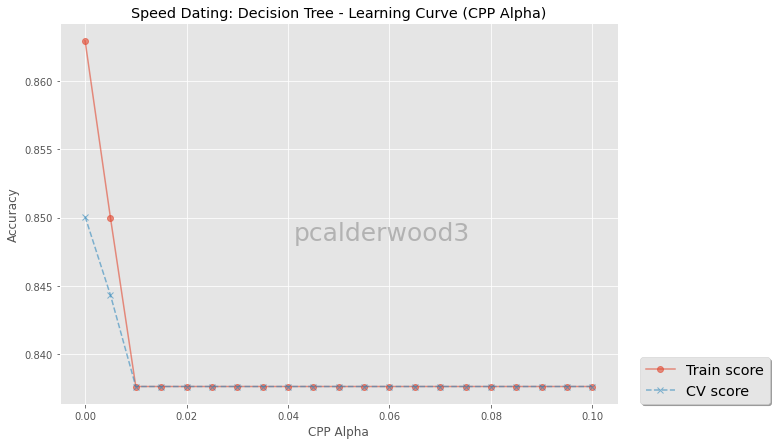

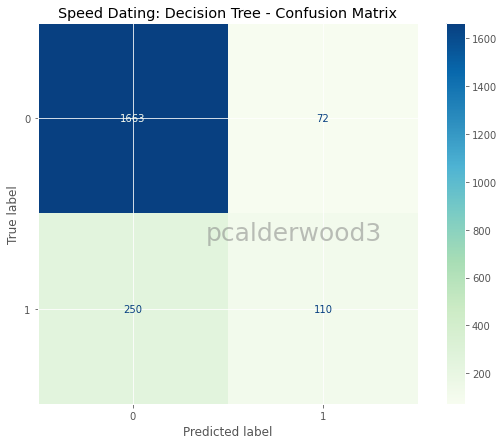

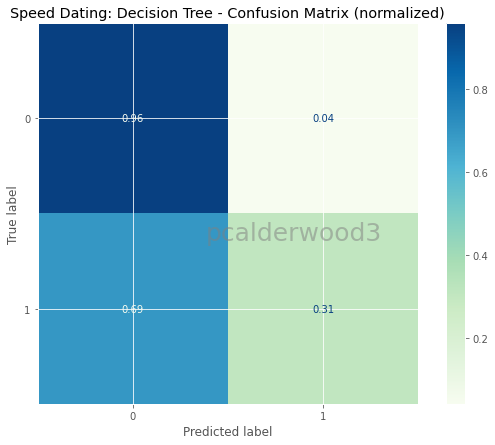

Best parameters took 0:00:00.183380 to train


In [5]:
dating_experiment.plotValidation()
dating_experiment.plotConfusion()
dating_experiment.plotLearningCurve()
dating_experiment.measureFitTime()

In [6]:
print(f'Top 5 params for {dating_experiment.datasetName} using {dating_experiment.leanerName}')
for p in dating_experiment.topParams(5):
    print(p)

Top 5 params for Speed Dating using Decision Tree
(0.8503900450470994, {'tree__ccp_alpha': 0.0, 'tree__class_weight': None, 'tree__criterion': 'entropy', 'tree__max_depth': 5})
(0.8480025234483074, {'tree__ccp_alpha': 0.0, 'tree__class_weight': None, 'tree__criterion': 'entropy', 'tree__max_depth': 4})
(0.8472078652539411, {'tree__ccp_alpha': 0.0, 'tree__class_weight': None, 'tree__criterion': 'gini', 'tree__max_depth': 4})
(0.845613228341669, {'tree__ccp_alpha': 0.0, 'tree__class_weight': None, 'tree__criterion': 'gini', 'tree__max_depth': 5})
(0.8452962771536718, {'tree__ccp_alpha': 0.0, 'tree__class_weight': None, 'tree__criterion': 'gini', 'tree__max_depth': 3})


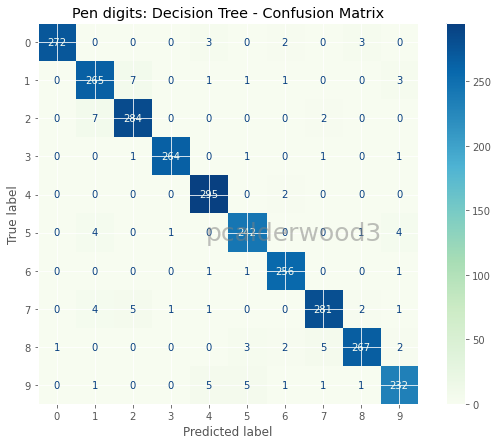

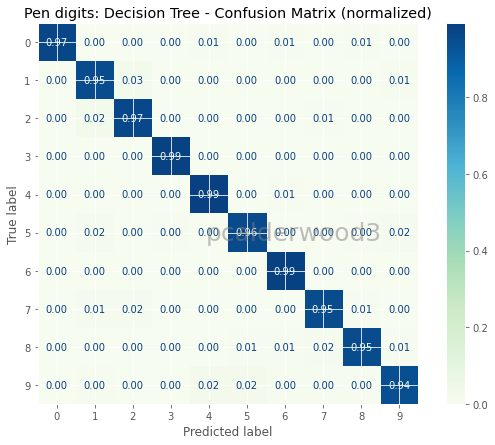

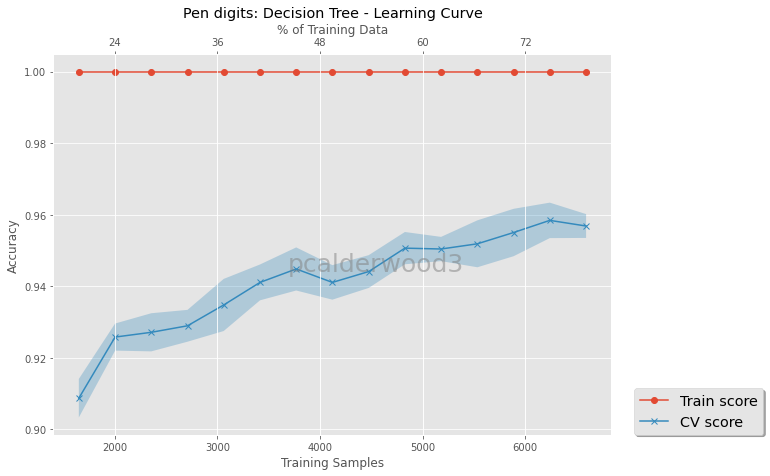

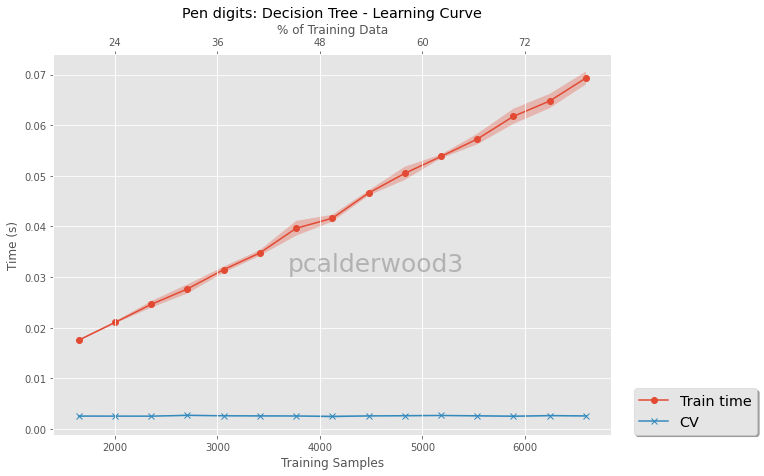

Best parameters took 0:00:00.170332 to train


In [7]:
pen_experiment.plotValidation()
pen_experiment.plotConfusion()
pen_experiment.plotLearningCurve()
dating_experiment.measureFitTime()

In [8]:
print(f'Top 5 params for {pen_experiment.datasetName} using {pen_experiment.leanerName}')
for p in pen_experiment.topParams(5):
    print(p)

Top 5 params for Pen digits using Decision Tree
(0.9587576613069408, {'tree__ccp_alpha': 0.0, 'tree__class_weight': 'balanced', 'tree__criterion': 'gini', 'tree__max_depth': 27})
(0.958757587711293, {'tree__ccp_alpha': 0.0, 'tree__class_weight': 'balanced', 'tree__criterion': 'gini', 'tree__max_depth': 21})
(0.9586363756792877, {'tree__ccp_alpha': 0.0, 'tree__class_weight': 'balanced', 'tree__criterion': 'gini', 'tree__max_depth': 30})
(0.9579090298916084, {'tree__ccp_alpha': 0.0, 'tree__class_weight': 'balanced', 'tree__criterion': 'gini', 'tree__max_depth': 16})
(0.9579082939351299, {'tree__ccp_alpha': 0.0, 'tree__class_weight': 'balanced', 'tree__criterion': 'gini', 'tree__max_depth': 15})
